In [1]:
import sys
sys.path.insert(1, r"E:\IlMIoDrive\magistrale\1anno\terzo_periodo\MAS\analysis")
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import powerlaw as pwl
from datetime import datetime,timezone
import random
import Econophysics as Ec
import credentials as cr
Ec = reload(Ec)
cr = reload(cr)
import networkx as nx
from collections import Counter
import math
import tweepy
import pickle
import statsmodels
#from strawberryfields.apps import subgraph
from scipy import stats

In [2]:
%%time

all_users_objs  = Ec.objs_loader(r"F:\TwitterUsers\processed_files\AT_thread_output\objs.txt")
# with open(r"F:\TwitterUsers\archiveTeam\processed_files\objs.txt","rb") as f:
#     all_users_objs = pickle.load(f)
#     f.close()
    
print("len( all_users_objs) = ",len( all_users_objs))
print(all_users_objs[0])

len( all_users_objs) =  161556
{'user_id': 55760936, 'followers_count': 144, 'friends_count': 141, 'created_at': '2009-07-11 04:50:53', 'favourites_count': 61, 'statuses_count': 2358}
Wall time: 144 ms


In [3]:
len(set([user["user_id"] for user in all_users_objs]))

161556

## Degree Analysis

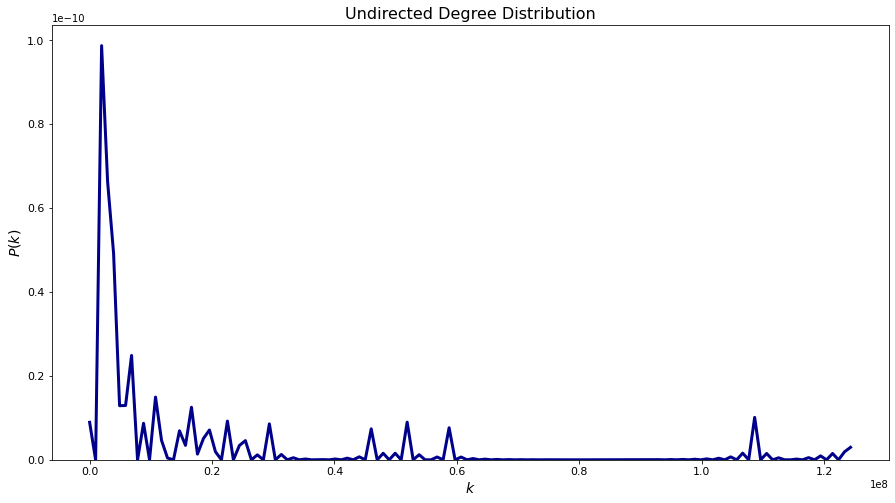

Mean =  9017.092079526603 
Var =  250245568215.4848
Wall time: 954 ms


In [4]:
%%time
# Get undirected degree distribution 
undirected_degree_view, degree_mean, degree_variance = Ec.get_view(all_users_objs,"degree")


# Set figure size
#plt.figure(figsize=(7,4))

# Plot undirected degree distribution 
Ec.plot_distribution_from_view(undirected_degree_view, 
                               hist = False,
                               bins = 10000,
                             title = "Undirected Degree Distribution", 
                             log = False, 
                             display_stats = True)

# Show mean and variance of the undirected degree distribution 
print("Mean = ", degree_mean,"\nVar = ", degree_variance)

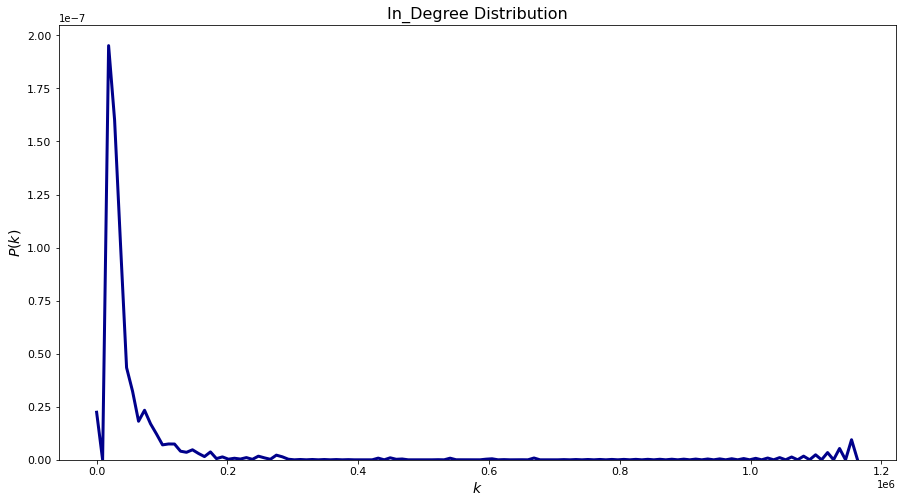

Mean =  1258.4791960682364 
Var =  42191568.45129292
Wall time: 361 ms


In [5]:
%%time
# Get undirected degree distribution 
In_degree_view, degree_mean, degree_variance = Ec.get_view(all_users_objs,"in_degree")


# Plot undirected degree distribution 
Ec.plot_distribution_from_view(In_degree_view, 
                                hist = False,
                               bins = 10000,
                             title = "In_Degree Distribution", 
                             log = False, 
                             display_stats = True)

# Show mean and variance of the undirected degree distribution 
print("Mean = ", degree_mean,"\nVar = ", degree_variance)

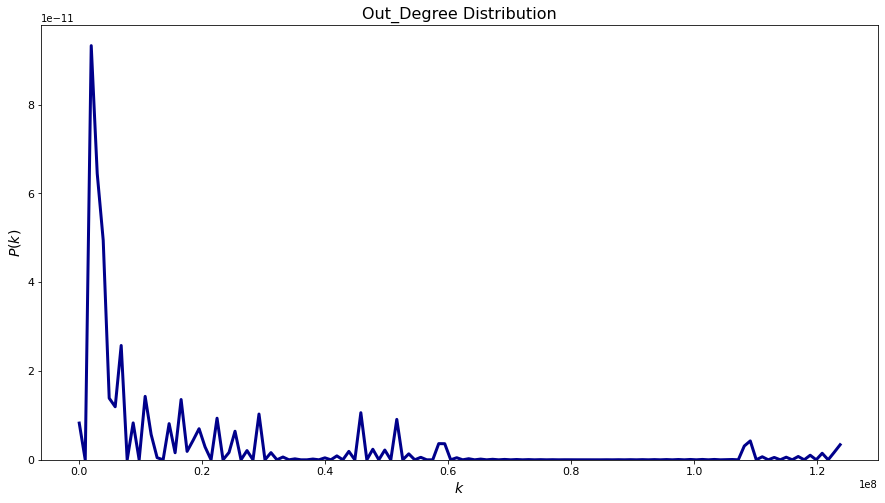

Mean =  7758.612883458367 
Var =  249176661222.53278


In [6]:
# Get undirected degree distribution 
out_degree_view, degree_mean, degree_variance = Ec.get_view(all_users_objs,"out_degree")


# Plot undirected degree distribution 
Ec.plot_distribution_from_view(out_degree_view, 
                               hist = False,
                               bins = 100000,
                             title = "Out_Degree Distribution", 
                             log = False, 
                             display_stats = True)

# Show mean and variance of the undirected degree distribution 
print("Mean = ", degree_mean,"\nVar = ", degree_variance)

### Logarithmic Binning
Plot log-binned distribution

In [50]:
# Plot
#pwl_distribution = Ec.power_law_plot(view = out_degree_view, log = True, linear_binning = False, bins = 1000, draw = True,rounding  = -2)

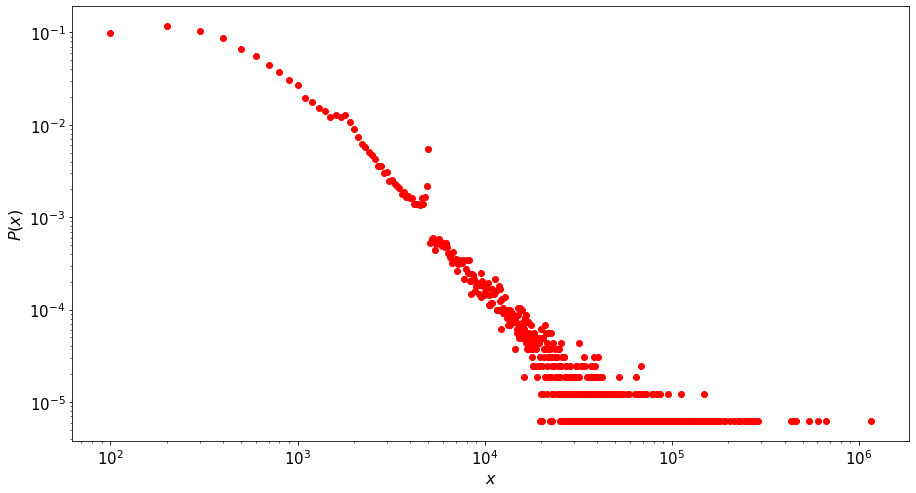

In [7]:
# Plot
pwl_distribution = Ec.power_law_plot(view = In_degree_view, log = True, linear_binning = False, bins = 1000, draw = True, rounding  = -2)

### Power Law Fitting 

Here we estimate the measure to which the degree sequence follows a power law.

#### Parameters Estimation

In [8]:
%%time
fit_function = pwl.Fit(list(In_degree_view.values()))

print("Exponent = ", fit_function.power_law.alpha)
print("Sigma (error associated to exponent) = ",fit_function.power_law.sigma)
xmin = fit_function.power_law.xmin
print("x_min = ",xmin)
print("Kolmogorov-Smirnov distance = ",fit_function.power_law.D)

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Q:\anaconda\Anaconda\envs\tf-gpu\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide


Exponent =  2.383234925928016
Sigma (error associated to exponent) =  0.02927850187732619
x_min =  9659.0
Kolmogorov-Smirnov distance =  0.015251741066900248
Wall time: 14.5 s


Let us now compare the actual PDF with the fitted power law near the tail.<br>
<span style="color:blue">**BLUE**</span> : Fitted power law. <br>
<span style="color:black">**BLACK**</span> : Plotted PDF.

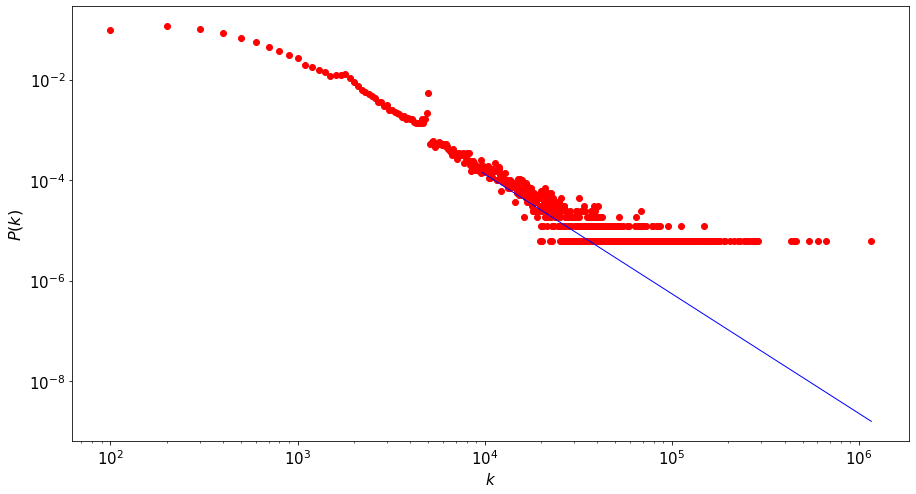

Wall time: 681 ms


In [9]:
%%time

pwl_distribution = Ec.power_law_plot(view = In_degree_view, log = True, linear_binning = False, bins = 90, draw = True, x_min = xmin,rounding = -2)

fit_function.power_law.plot_pdf(color='b', linestyle='-', linewidth=1)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('$k$', fontsize=15)
plt.ylabel('$P(k)$', fontsize=16)
plt.show()

## Activity Analysis
Plot the smoothed distribution

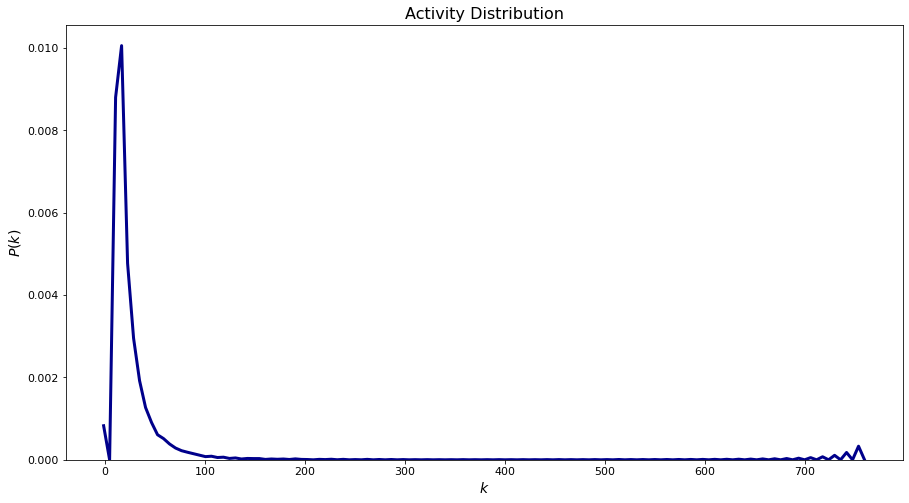

Mean =  7.506578084443541 
Var =  226.58487187249204
Wall time: 4.92 s


In [6]:
%%time

statuses_activity_view , mean ,var = Ec.get_view(users_objs = all_users_objs,which = "activity_from_metadata",w = [1,0,0])


# Plot undirected degree distribution 
Ec.plot_distribution_from_view(statuses_activity_view,
                               hist = False,
                             title = "Activity Distribution", 
                             log = False, 
                             display_stats = True)

# Show mean and variance of the undirected degree distribution 
print("Mean = ", mean,"\nVar = ", var)

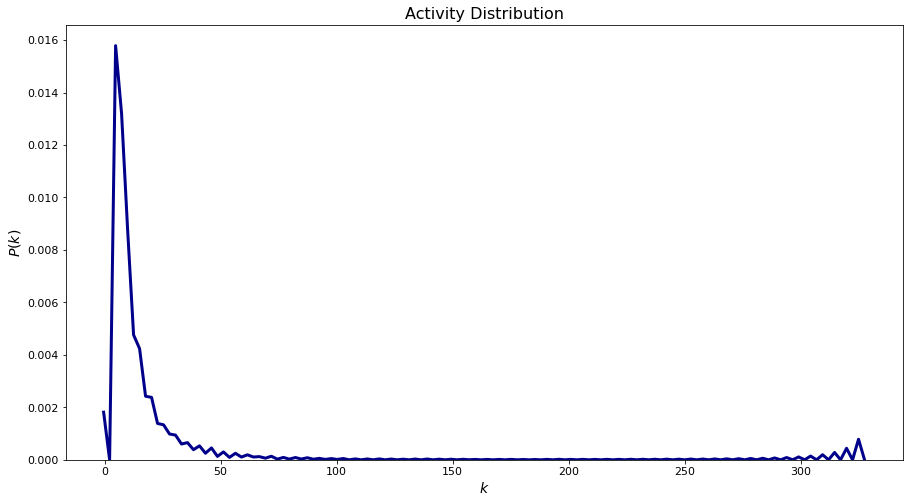

Mean =  2.8868558261360366 
Var =  68.58083657853224
Wall time: 3.46 s


In [7]:
%%time

favourites_activity_view , mean ,var = Ec.get_view(users_objs = all_users_objs,which = "activity_from_metadata",w = [0,1,0])


# Plot undirected degree distribution 
Ec.plot_distribution_from_view(favourites_activity_view,
                               hist = False,
                             title = "Activity Distribution", 
                             log = False, 
                             display_stats = True)

# Show mean and variance of the undirected degree distribution 
print("Mean = ", mean,"\nVar = ", var)

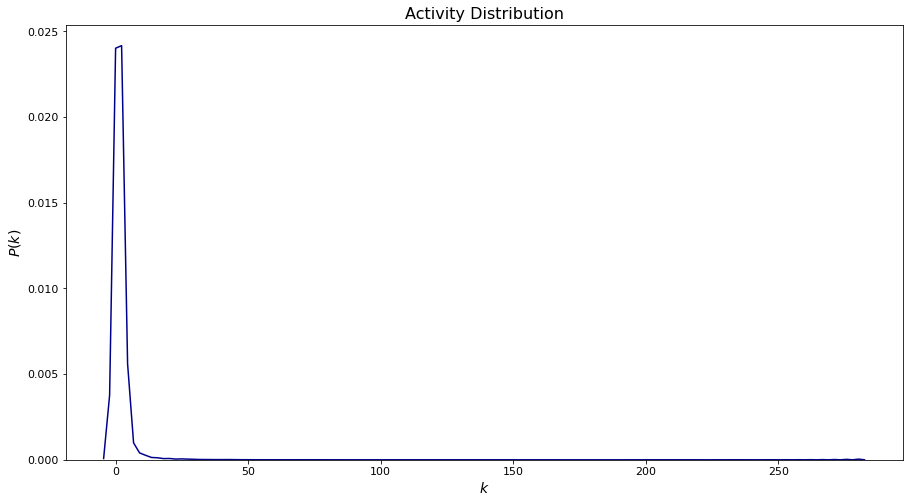

Mean =  0.33831124534075946 
Var =  2.829830871755503
Wall time: 3.45 s


In [8]:
%%time

follow_activity_view , mean ,var = Ec.get_view(users_objs = all_users_objs,which = "activity_from_metadata",w = [0,0,1])


# Plot undirected degree distribution 
Ec.plot_distribution_from_view(follow_activity_view,
                               hist = False,
                             title = "Activity Distribution", 
                             log = False, 
                             display_stats = True,
                             kde_kws = {"bw":1.5})

# Show mean and variance of the undirected degree distribution 
print("Mean = ", mean,"\nVar = ", var)

In [44]:
ids = list(follow_activity_view.keys())
activity_view = {ID:[statuses_activity_view[ID],favourites_activity_view[ID],follow_activity_view[ID]] for ID in ids}
values = np.vstack([[value[0] for value in activity_view.values()],[value[1] for value in activity_view.values()],[value[2] for value in activity_view.values()]]) #
kernel = stats.gaussian_kde(values)
predictions = kernel.resample(40000)

In [45]:
with open(r"G:\TwitterUsers\julia_bridge\activity_data.txt", "wb") as f:
    pickle.dump(predictions,f)
    f.close()

In [11]:
print(min(list(activity_view.values())),max(list(activity_view.values())))

0.0 855.8058192496715


### Logarithmic Binning
Plot log-binned distribution

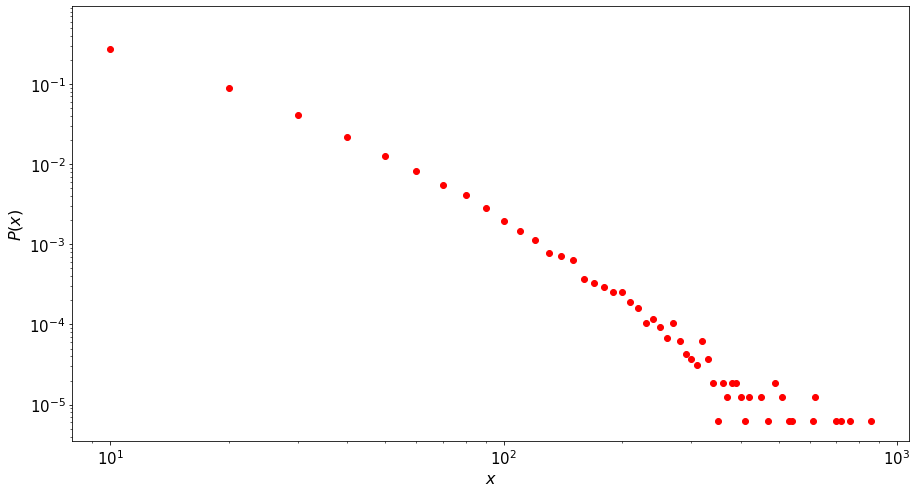

In [12]:
# Set figure size

# Plot
pwl_distribution = Ec.power_law_plot(view = activity_view, log = True, linear_binning = False, bins = 1000, draw = True,rounding = -1)

## 2012 Retweet Network Analysis

In [2]:
# with open(r"F:\TwitterUsers\archiveTeam\processed_files\retweet_network.txt", "rb") as f:
#     retweet_objs = pickle.load(f)
#     print("len(retweet_objs) = ", len(retweet_objs))
#retweet_objs  = Ec.objs_loader(r"F:\TwitterUsers\archiveTeam\processed_files\retweet_network.txt")
retweet_objs = np.load(r"G:\TwitterUsers\processed_files\Initialization_RTWT_output_mentions_up\Initialization_retweet_network_mentions_up_14_10.npy", allow_pickle = True)

In [3]:
retweet_objs[2]

{'user_id': 24641540,
 'user_favorited_count': 1988,
 'user_retweeted_count': 28901093,
 'retweeted_users_ids': [610443456,
  1266596431420252160,
  163876555,
  2216147968,
  1496292445,
  576638905,
  819378874819768320,
  720257823469252608,
  2492401730,
  3382141829,
  3382141829,
  2556775486,
  347418609,
  1730081102,
  13049362,
  262817465,
  138203134,
  747432848,
  30354991,
  1176636037,
  838518518,
  1176636037,
  76997832,
  23876219,
  23876219,
  262817465,
  281813521,
  738502910041042946,
  1127285468880568320,
  433720972,
  540488894,
  436079352,
  16524285,
  2806253912,
  1108864916348260353,
  1039762237,
  33913156,
  4327127414,
  2177150210,
  907007454,
  1214243165936308224,
  509164865,
  1087482967973380097,
  45709328,
  544002033,
  527616610,
  2761445522,
  1138070084,
  1136845559619153921,
  1176636037,
  396732043,
  3177077977,
  732387981399494656,
  2415428186,
  728359897226686466,
  707580710404562946,
  1030464923619475456,
  1146166441,


In [4]:
nodes = set([user["user_id"] for user in retweet_objs])
print(len(nodes))

161559


In [64]:
# streamed_nodes = set(np.load(r"F:\TwitterUsers\streams\election2020\user_ids.npy",allow_pickle = True))
# intersection_nodes = list(nodes.intersection(streamed_nodes))
# len(intersection_nodes)

8691

In [65]:
#involved_nodes =  set([user["user_id"] for user in retweet_objs])

In [5]:
all_edges = [(user["user_id"], user["retweeted_users_ids"][i]) for user in retweet_objs for i in range(len(user["retweeted_users_ids"])) ] + [(user["user_id"], user['mentioned_users_ids'][i]) for user in retweet_objs for i in range(len(user['mentioned_users_ids']))] #'mentioned_users_ids'
len(all_edges)

2124460

In [6]:
edge_list = [tup for tup in all_edges if tup[1] in nodes]
len(edge_list)

191060

In [7]:
edge_list[0]

(122159104, 11134252)

In [8]:
%%time
retweet_counter = dict(Counter(edge_list))
weighted_edge_list = [(*list(retweet_counter.keys())[i], list(retweet_counter.values())[i]) for i in range(len(retweet_counter ))]

Wall time: 22.6 s


In [70]:
#sum([edge[2] for edge in weighted_edge_list ])

In [9]:
retweet_network = nx.DiGraph()
#retweet_network.add_nodes_from(nodes)
retweet_network.add_weighted_edges_from(weighted_edge_list)
retweet_network_unweighted = nx.DiGraph()#.add_edges_from(edge_list)
retweet_network_unweighted.add_edges_from(edge_list)
retweet_network.name = "retweet network"
# Show the basic attributes of the graph
print(nx.info(retweet_network))

Name: retweet network
Type: DiGraph
Number of nodes: 10285
Number of edges: 32151
Average in degree:   3.1260
Average out degree:   3.1260


In [17]:
ids = set(retweet_network.nodes())
old_ids  = set(np.load(r"G:\TwitterUsers\monitor\ids\user_ids.npy", allow_pickle = True))
missing = ids-old_ids
missing_1 = old_ids-ids

In [12]:
len(missing)

6195

In [19]:
len(missing_1)

4236

In [53]:
nx.info(retweet_network_unweighted)

'Name: \nType: DiGraph\nNumber of nodes: 8391\nNumber of edges: 22314\nAverage in degree:   2.6593\nAverage out degree:   2.6593'

In [20]:
effective_nodes = list(retweet_network.nodes())

In [21]:
np.save(r"G:\TwitterUsers\monitor\ids\user_ids.npy", np.array(effective_nodes))

Plot the smoothed distributions

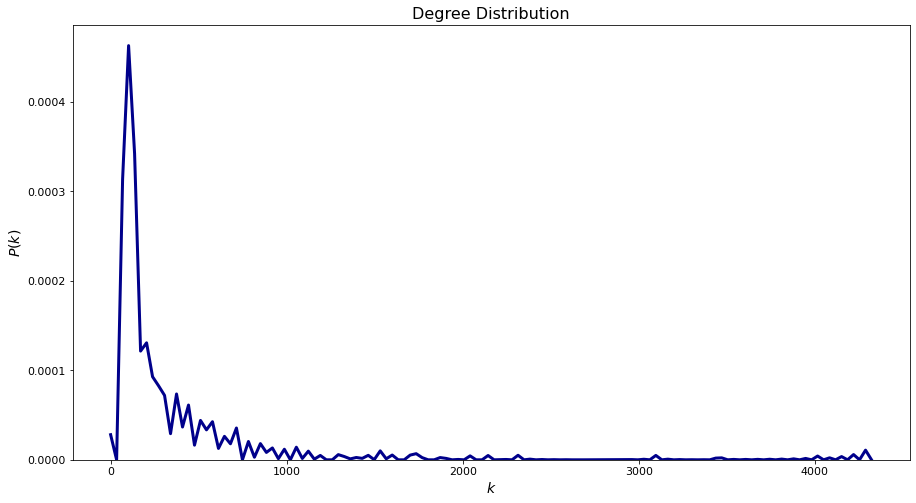

In [24]:
Ec = reload(Ec)
Ec.plot_distribution_from_view(dict(retweet_network.degree(weight = "weight")),
                               hist = False,
                               bins = 100000,
                               title = "Degree Distribution", 
                               log = False, 
                               display_stats = True
                               ) #kde_kws = {"bw":1.5} if complains about bandwidth & plot is blank

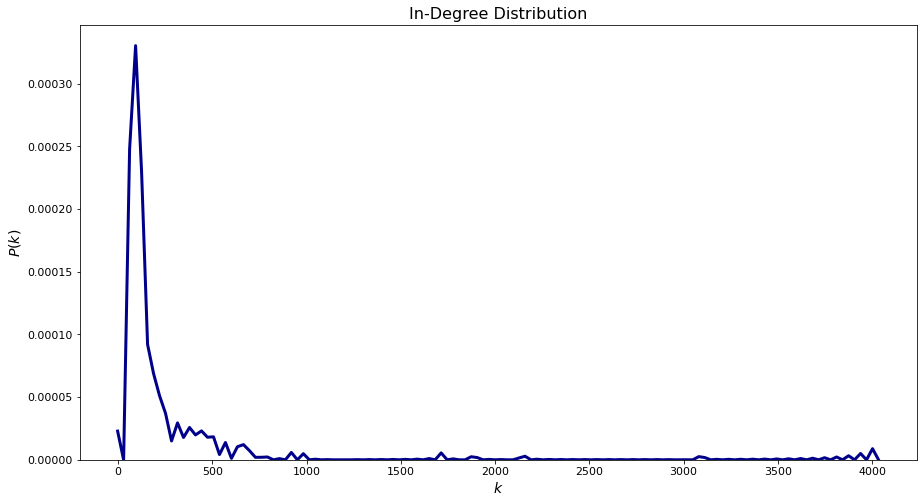

In [25]:
Ec.plot_distribution_from_view(dict(retweet_network.in_degree(weight = "weight")),
                               hist = False,
                               bins = 100000,
                               title = "In-Degree Distribution", 
                               log = False, 
                               display_stats = True)
                                 #kde_kws = {"bw":1.5} if complains about bandwidth & plot is blank

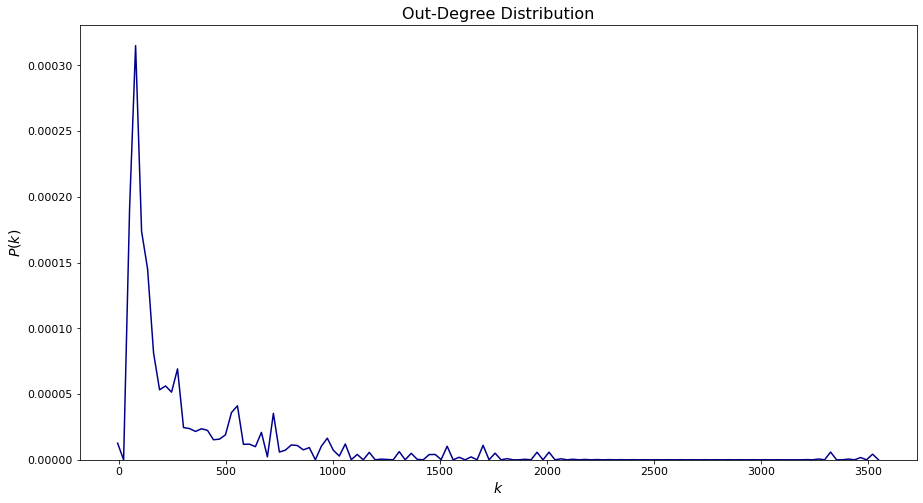

In [27]:
Ec.plot_distribution_from_view(dict(retweet_network.out_degree(weight = "weight")),
                               hist = False,
                               bins = 100000,
                               title = "Out-Degree Distribution", 
                               log = False, 
                               display_stats = True,
                               kde_kws = {"bw":1.5}) #kde_kws = {"bw":1.5} if complains about bandwidth & plot is blank

Logarithimc binning

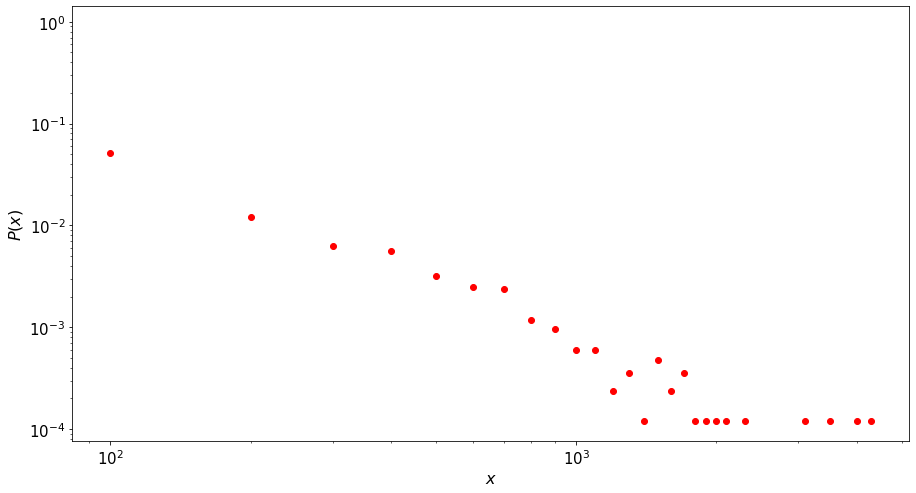

In [28]:
pwl_distribution = Ec.power_law_plot(view = dict(retweet_network.degree(weight = "weight")), log = True, linear_binning = False, bins = 1000, draw = True, rounding  = -2)

In [76]:
# in_pwl_distribution = Ec.power_law_plot(view = dict(retweet_network.in_degree()), log = True, linear_binning = False, bins = 1000, draw = True, rounding  =2)
# out_pwl_distribution = Ec.power_law_plot(view = dict(retweet_network.out_degree()), log = True, linear_binning = False, bins = 1000, draw = True, rounding  =2)

### Centrality Metrics 

We compute and visualize the portfolio of centrality metrics.
#### Closeness

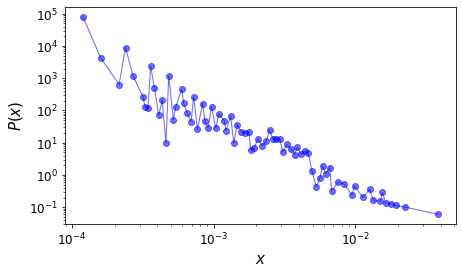

In [29]:
# Get closeness centrality (computationally intensive!)
# maybe implement it explicitly so thet it takes into account the weighted nature of the graph
closeness_centrality = Ec.get_centrality(retweet_network, "closeness")

# Set figure size
plt.figure(figsize=(7,4))

# Plot centrality distribution
Ec.plot_centrality_distribution(retweet_network, closeness_centrality, "Blue", 100)

### Betweenness

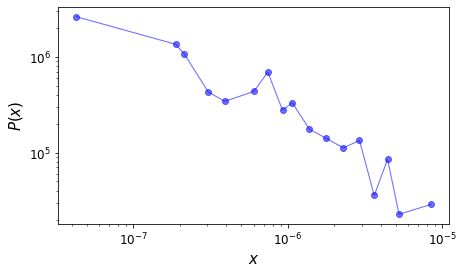

Wall time: 59.5 s


In [30]:
%%time
# Get centrality 
betweenness_centrality = Ec.get_centrality(retweet_network, "betweenness", weight = "weight")

# Set figure size
plt.figure(figsize=(7,4))

# Plot centrality distribution
Ec.plot_centrality_distribution(retweet_network, betweenness_centrality, "Blue", 30)

### PageRank
$$x_i=(1-\alpha) \sum_{j}A^{T}_{ij}\frac{x_j}{k^{out}_j}+\frac{\alpha}{N}$$

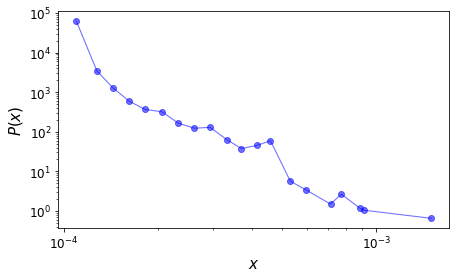

In [31]:
# Get centrality 
pagerank_centrality = Ec.get_centrality(retweet_network, "pagerank", weight='weight')

# Set figure size
plt.figure(figsize=(7,4))

# Plot centrality distribution
Ec.plot_centrality_distribution(retweet_network, pagerank_centrality, "Blue", 30)

## Connectivity 

Here we explore the connectivity of the graph.

In [56]:
# Show the connectivity of the analyzed graph
print("The graph has", retweet_network.number_of_nodes(), "nodes and", retweet_network.number_of_edges(),"edges.")
print("Is the (directed) graph weakly connected?", nx.is_weakly_connected(retweet_network),".")  
print("Is the (directed) graph strongly connected?", nx.is_strongly_connected(retweet_network),".")
retweet_network_weakly_cc = list(nx.weakly_connected_components(retweet_network))
print("The graph has", len(retweet_network_weakly_cc),"weakly connected components.")
print("The sizes of the weakly connected components are", [len(c) for c in sorted(retweet_network_weakly_cc, key=len, reverse=True)],".")
retweet_network_strongly_cc = list(nx.strongly_connected_components(retweet_network))
print("The graph has", len(retweet_network_strongly_cc),"strongly connected components.")
print("The sizes of the strongly connected components are", [len(c) for c in sorted(retweet_network_strongly_cc, key=len, reverse=True)],".")

The graph has 8391 nodes and 22314 edges.
Is the (directed) graph weakly connected? False .
Is the (directed) graph strongly connected? False .
The graph has 58 weakly connected components.
The sizes of the weakly connected components are [8273, 6, 5, 5, 5, 5, 4, 4, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] .
The graph has 8389 strongly connected components.
The sizes of the strongly connected components are [2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

### Clustering 

Here we compute the **average clustering coefficient** and the **global clustering coefficient**.

In [33]:
# Consider the undirected version (G -> U)
retweet_network_undirected = retweet_network.to_undirected()

# Rename the undirected graph 

retweet_network_undirected.name = "Undirected retweet network"

# Show the basic attributes of U vs. G 
print(nx.info(
retweet_network_undirected), "\n")
print(nx.info(retweet_network))

Name: Undirected retweet network
Type: Graph
Number of nodes: 8391
Number of edges: 22312
Average degree:   5.3181 

Name: retweet network
Type: DiGraph
Number of nodes: 8391
Number of edges: 22314
Average in degree:   2.6593
Average out degree:   2.6593


### Global Clustering Coefficient
The global clustering coefficient measures the number of triangles in the network and it's defined as

$$ C_\Delta = \frac{3 \times \text{triangles}}{\text{triplets}} $$

In order to compare our graph with theorical models (of the same size), it is thus sufficient to evaluate the number of triangles.

In [54]:
# Compute the global clustering coefficient of U (the fraction of all possible triangles in the network)
print("Global clustering coefficient = ", nx.transitivity(retweet_network))

Global clustering coefficient =  0.0006278445281151919


### Average Clustering Coefficient

The overall level of clustering in a network is measured by Watts and Strogatz as the average of the local clustering coefficients of all the vertices $n$:

$$\bar{C} = \frac{1}{n}\sum_{i=1}^{n} C_i.$$


It is worth noting that this metric places more weight on the low degree nodes, while the transitivity ratio places more weight on the high degree nodes. In fact, a weighted average where each local clustering score is weighted by $k_i(k_i-1)$ is identical to the global clustering coefficient. <br> As per [this](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html) and [this](https://networkx.github.io/documentation/stable/_modules/networkx/algorithms/cluster.html ) resources we notice that Networkx's `average_clustering` function automatically takes care of the network being directed or not.

In [35]:
retweet_network_avg_cc =  nx.average_clustering(retweet_network)
print("The average clustering coefficient is ",retweet_network_avg_cc) 

The average clustering coefficient is  0.003911100272526741


### Path-ology  

#### Average Shortest Path Length

In [57]:
%%time
#print("The average shortest path length is ", nx.average_shortest_path_length(G),"") # Graph is not weakly connected.

average_degree = sum(list(dict(retweet_network.degree(weight = "weight")).values()))/len(retweet_network.degree(weight = "weight")) #weight = "weight"
#average_degree = sum(list(dict(retweet_network_unweighted.degree()).values()))/len(retweet_network_unweighted.degree()) #weight = "weight"
retweet_network_WCC = list(retweet_network_weakly_cc[0])

print("Since the graph is not weakly connected, but one of its 3 weakly connected compoments amounts for ",len(retweet_network_WCC)/len(retweet_network_WCC), "of the nodes count, we approximate its averaege shortest path length with that of its bigger weakly connected component, which is:", nx.average_shortest_path_length(retweet_network.subgraph(retweet_network_WCC)), "\nLet's compare it with lnlnN = ", math.log(math.log(len(retweet_network_WCC))), "(ultra small world)\nand with lnN/lnlnN = ", math.log(len(retweet_network_WCC))/math.log(math.log(len(retweet_network_WCC))), "(equivalent to a power law with exponent 3)\nand with lnN = ", math.log(len(retweet_network_WCC))/math.log(average_degree), "equivalent to a random network.")

Since the graph is not weakly connected, but one of its 3 weakly connected compoments amounts for  1.0 of the nodes count, we approximate its averaege shortest path length with that of its bigger weakly connected component, which is: 0.0005135001394623184 
Let's compare it with lnlnN =  2.1995277540085385 (ultra small world)
and with lnN/lnlnN =  4.101222393193391 (equivalent to a power law with exponent 3)
and with lnN =  5.397763863797091 equivalent to a random network.
Wall time: 552 ms


### Degree Assortativity of a Network
A network is assortative with respect to a feature/features if nodes with similar feature(s) values are more often connected between them rather then with nodes having different feature(s) values.<br>
The degree assortativity is assortativity with respect to degree: are nodes with similar degree more connected between themselves than with nodes with different degree?<br>
Degree assortativity can be measured in different ways. Using scalar assortativity theory we get the following quantities:

In [37]:
# degree assortativity can also be computed with nx's functions
# Compute the degree assortativity coefficient of G and ER
dac_retweet_network = nx.degree_assortativity_coefficient(retweet_network) # this is the pearson correlation coefficient of the red dots of the plot above.

print("The degree assortativity coefficient of G is", dac_retweet_network)

# Compute the Pearson / linear correlation coefficient with nx function
pcc_retweet_network = nx.degree_pearson_correlation_coefficient(retweet_network)

print("The Pearson correlation coefficient of G is", pcc_retweet_network)

The degree assortativity coefficient of G is -0.18274128590248412
The Pearson correlation coefficient of G is -0.1827412859024839


Anyway, this approach does not take into consideration possible nonlinear degree correlations.
A less powerful but more general approach would be to measure the average nearest neighbor degree per degree class, in order to determine a possible trend and to compare it with the expected average nearest neighbor degree per degree class if the network is uncorrelated, in which case:

$$ k_{nn}^{unc}(k) = \frac{\langle k^2 \rangle}{\langle k \rangle}$$

In [38]:
nx.set_node_attributes(retweet_network,  {node:retweet_network.degree(node, weight = "weight") for node in retweet_network.nodes()},"degree")

k_unc =  59.501875605033845


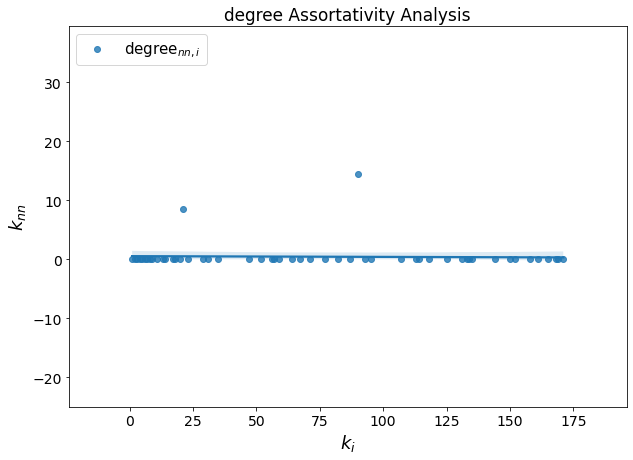

In [39]:
#Ec = reload(Ec)
Ec.get_assortativity(retweet_network, mode ="degree", direction = "both", extremists_tolerance = 1, outliers_tolerance = 1)

### Opinion Estimation

In [ ]:
#hashtags = [{"user_id": user["user_id"], "hashtags":[dct["text"] for lst in user["hashtags"] for dct in lst]} for user in retweet_objs]

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "Q:\anaconda\Anaconda\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-88-d60c2afbf235>", line 1, in <module>
    hashtags = [{"user_id": user["user_id"], "hashtags":[dct["text"] for lst in user["hashtags"] for dct in lst]} for user in retweet_objs]
  File "<ipython-input-88-d60c2afbf235>", line 1, in <listcomp>
    hashtags = [{"user_id": user["user_id"], "hashtags":[dct["text"] for lst in user["hashtags"] for dct in lst]} for user in retweet_objs]
  File "<ipython-input-88-d60c2afbf235>", line 1, in <listcomp>
    hashtags = [{"user_id": user["user_id"], "hashtags":[dct["text"] for lst in user["hashtags"] for dct in lst]} for user in retweet_objs]
TypeError: string indices must be integers

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "Q:\anaconda\Anaconda\envs\tf

In [11]:
hashtags = []
with open(r"E:\IlMioDrive\magistrale\1anno\terzo_periodo\MAS\temp\hashtags\hashtags_1_filtered.txt","rb") as f:
    hashtags = pickle.load(f)
    f.close()
len(hashtags)

6948

In [12]:
hashtags[0]

'reasonswhyobamashouldwin'

In [ ]:
#hashtags_unique = tuple(set([hashtag for user in hashtags for hashtag in user["hashtags"] ]))

ERROR! Session/line number was not unique in database. History logging moved to new session 723


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "Q:\anaconda\Anaconda\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-89-bd417dabd69f>", line 1, in <module>
    hashtags_unique = tuple(set([hashtag for user in hashtags for hashtag in user["hashtags"] ]))
NameError: name 'hashtags' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "Q:\anaconda\Anaconda\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Claudio\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\pywrap_tensorflow.py", line 58, in <module>
    from ten

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "Q:\anaconda\Anaconda\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-89-bd417dabd69f>", line 1, in <module>
    hashtags_unique = tuple(set([hashtag for user in hashtags for hashtag in user["hashtags"] ]))
NameError: name 'hashtags' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "Q:\anaconda\Anaconda\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "Q:\anaconda\Anaconda\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3263, in run_ast_nodes
    if (await self.run_code(

In [13]:
hashtags = set(hashtags)
len(hashtags)

6948

In [21]:
hashtags_dct = [{"hashtag": hashtag, "polarity":1,"source":""} for hashtag in hashtags]

In [22]:
with open(r"E:\IlMioDrive\magistrale\1anno\terzo_periodo\MAS\temp\hashtags\polarized_hashtags\polarized_hashtags.txt", "wb") as f:
    pickle.dump(hashtags_dct,f)
    f.close()

In [23]:
splits = Ec.split_array(hashtags_dct, 4)

In [24]:
for name,split in zip(["hashtags_claudio.txt","hashtags_pietro.txt","hashtags_davide.txt","hashtags_riccardo.txt"],splits):
    with open(r"E:\IlMioDrive\magistrale\1anno\terzo_periodo\MAS\temp\hashtags\polarized_hashtags\splits\\"+name,"wb") as f:
        pickle.dump(split,f)
        f.close()

In [25]:
splits[0]

array([{'hashtag': 'romneygangordie', 'polarity': 1, 'source': ''},
       {'hashtag': 'antimittromney', 'polarity': 1, 'source': ''},
       {'hashtag': 'ReasonsToVoteForObama', 'polarity': 1, 'source': ''},
       ..., {'hashtag': 'romneytowin', 'polarity': 1, 'source': ''},
       {'hashtag': 'OBAMAUK', 'polarity': 1, 'source': ''},
       {'hashtag': 'RomneyHasNoLogic', 'polarity': 1, 'source': ''}],
      dtype=object)

In [23]:
str([{"a":2},{"b":3}])

"[{'a': 2}, {'b': 3}]"

In [26]:
for name,split in zip(["hashtags_claudio.txt","hashtags_pietro.txt","hashtags_davide.txt","hashtags_riccardo.txt"],splits):
    with open(r"E:\IlMioDrive\magistrale\1anno\terzo_periodo\MAS\temp\hashtags\polarized_hashtags\splits\text_files\\"+name,"wt") as f:
        f.write(str(split.tolist()).replace("},","},\n"))
        f.close()

In [90]:
# def find_substr(string, substrings):
#     found = False
#     for sub in substrings:
#         if str.lower(sub) in str.lower(string):
#             found = True
#             break
#     if found:
#         return True
#     else:
#         return False

In [91]:
# interesting_words = set( ["referendum", "referendum2020", "referendum popolare", "referendum costituzionale",
#            "iovotono", "iovotosì", "iononvoto",  
#            "iovotono_referendum2020", "iovotosì_referendum2020", 
#            "votosì", "votono", "nonvoto",
#            "votatesì", "votateno", "nonvotate",
#            "contrario", "favorevole", 
#            "taglioparlamentari", "riduzioneparlamentari", "taglio numero parlamentari", "riduzione parlamentari", 
#            "noaltagliodeiparlamentari", "sìaltagliodeiparlamentari", 
#            "iovotono_referendum2020", "iovotosì_referendum2020", 
#            "taglio democrazia", "taglio costituzione"] + ["taglio","popolare","costituzione","costituzionale","numero","voto","votate","parlamentari","riduzione","democrazia"] ) #io #"si","sì","no",

ERROR! Session/line number was not unique in database. History logging moved to new session 725


In [92]:
#interesting_hashtags  = [hashtag for hashtag in hashtags_unique if find_substr(hashtag,interesting_words)]

In [93]:
#interesting_hashtags

In [94]:
#interesting_hashtags_dct = [{"hashtag":hashtag, "polarity":1} for hashtag in interesting_hashtags ]

In [95]:
#interesting_hashtags_dct 

In [96]:
polarized_hashtags  = [{'hashtag': 'votodiscambio', 'polarity': 0}, #https://twitter.com/pdnetwork/status/1103692506217308160?s=20
 {'hashtag': 'CorteCostituzionale', 'polarity': 0},
 {'hashtag': 'furbettidelreferendum', 'polarity': -1}, #https://twitter.com/maurizioft/status/1292946041789177856
 {'hashtag': 'oggivotoLega', 'polarity': 0},
 {'hashtag': 'incostituzionale', 'polarity': 0},
 {'hashtag': 'nuovotaglio', 'polarity': 0},
 {'hashtag': 'votolunedi', 'polarity': 0},
 {'hashtag': 'IoVotoNOcomunque', 'polarity': -1},
 {'hashtag': 'VotoaiSedicenni', 'polarity': 0},
 {'hashtag': 'riduzione', 'polarity': 0},
 {'hashtag': 'TaglioNucleoFiscale', 'polarity': 0},
 {'hashtag': 'TaglioDeiParlamentari', 'polarity': 0},
 {'hashtag': 'VotoSubito', 'polarity': 0},
 {'hashtag': 'VotateNo', 'polarity': -1},
 {'hashtag': 'tagliodilibertà', 'polarity': -1},
 {'hashtag': 'televototruccato', 'polarity': 0},
 {'hashtag': 'tagliodellademocrazia', 'polarity': -1},
 {'hashtag': 'votomatteoperche', 'polarity': 0},
 {'hashtag': 'PopolareBari', 'polarity': 0},
 {'hashtag': 'NonMENO_Parlamentari_maMIGLIORI', 'polarity': -1}, #https://www.google.com/search?q=twitter+%23nonMeno_Parlamentari_maMigliori&oq=twitter+%23nonMeno_Parlamentari_maMigliori&aqs=chrome..69i57j69i64.138j0j15&sourceid=chrome&ie=UTF-8
 {'hashtag': 'referendum29marzo', 'polarity': 0},
 {'hashtag': 'IOVOTOSI', 'polarity': 1},
 {'hashtag': 'referendum2020_iovotono', 'polarity': -1},
 {'hashtag': 'IovotoSI', 'polarity': 1},
 {'hashtag': 'iovotoSí', 'polarity': 1},
 {'hashtag': 'VaglioDeiParlamentari', 'polarity': 0},
 {'hashtag': 'greekreferendum', 'polarity': 0},
 {'hashtag': 'elezioni2020_iovotono', 'polarity': -1},
 {'hashtag': 'iovotoNOtaglioParlamentari', 'polarity': -1},
 {'hashtag': '4marzovotoForzaItalia', 'polarity': 0},
 {'hashtag': 'tagliodeiParlamentari', 'polarity': 0},
 {'hashtag': 'Tagliostipendi', 'polarity': 0},
 {'hashtag': 'referendum2020_iovotoNo', 'polarity': -1},
 {'hashtag': 'NOALTAGLIODEIPARLAMENTARI', 'polarity': -1},
 {'hashtag': 'ByeByeParlamentari', 'polarity': -1},
 {'hashtag': 'TAGLIODEIPARLAMENTARI', 'polarity': 0},
 {'hashtag': 'VotoNo', 'polarity': -1},
 {'hashtag': 'IOvotoNo', 'polarity': -1},
 {'hashtag': 'notaglioparlamentari', 'polarity': -1},
 {'hashtag': 'SalviamolaCostituzione', 'polarity': 0},
 {'hashtag': 'parlamentari', 'polarity': 0},
 {'hashtag': 'CASAPOPOLARE', 'polarity': 0},
 {'hashtag': 'votosubitistiinritirata', 'polarity': 0},
 {'hashtag': 'TaglioParlamentari', 'polarity': 0},
 {'hashtag': 'Democrazia', 'polarity': 0},
 {'hashtag': 'tagiodeiparlamentari', 'polarity': 0},
 {'hashtag': 'voto', 'polarity': 0},
 {'hashtag': 'riformacostituzionale', 'polarity': 0},
 {'hashtag': 'iovotobo', 'polarity': 0}, #https://twitter.com/twittenattori/status/794934772220968960?s=20
 {'hashtag': 'art49costituzione', 'polarity': 0},
 {'hashtag': 'LaDemocraziaNonSiTaglia', 'polarity': 1},
 {'hashtag': 'cortecostituzionale', 'polarity': 0},
 {'hashtag': 'costituzione', 'polarity': 0},
 {'hashtag': 'LaDemocraziaDeiSorciVERDI', 'polarity': 0},
 {'hashtag': 'Tagliodeiparlamentari', 'polarity': 0},
 {'hashtag': 'PetizionePopolare', 'polarity': 0},
 {'hashtag': 'referendumcostituzionale', 'polarity': 0},
 {'hashtag': 'PopolarediSondrio', 'polarity': 0},
 {'hashtag': 'ogginonvotolega', 'polarity': 0},
 {'hashtag': 'ReferendumSullEuro', 'polarity': 0},
 {'hashtag': 'Referendum2020_iovotoSi', 'polarity': 1},
 {'hashtag': 'Parlamentari', 'polarity': 0},
 {'hashtag': 'pandemocrazia', 'polarity': 0},
 {'hashtag': 'costituzionecoasttocoast', 'polarity': 0},
 {'hashtag': 'tagliodeiparlameri', 'polarity': 0},
 {'hashtag': 'votosubito', 'polarity': 0},
 {'hashtag': 'iovotosì', 'polarity': 1},
 {'hashtag': 'ioNONvotoRaggiSindacodiRoma', 'polarity': 0},
 {'hashtag': 'Notaglioparlamentari', 'polarity': -1},
 {'hashtag': 'referendum', 'polarity': 0},
 {'hashtag': 'Voto', 'polarity': 0},
 {'hashtag': 'LaDemocraziaDeiSorciVerdi', 'polarity': 0},
 {'hashtag': 'democraziarappresentativa', 'polarity': 0},
 {'hashtag': 'votoutile', 'polarity': 0},
 {'hashtag': 'iovotosi', 'polarity': 1},
 {'hashtag': 'PopolarediBari', 'polarity': 0},
 {'hashtag': 'Referendum2020', 'polarity': 0},
 {'hashtag': 'iovotoSItaglioParlamentari', 'polarity': 1},
 {'hashtag': 'oggivotolega', 'polarity': 0},
 {'hashtag': 'ViolazioneDellaCostituzione', 'polarity': 0},
 {'hashtag': 'referendumveneto', 'polarity': 0},
 {'hashtag': 'ReferendumAutonomia', 'polarity': 0},
 {'hashtag': 'PARLAMENTARI', 'polarity': 0},
 {'hashtag': 'oggiNONvotolega', 'polarity': 0},
 {'hashtag': 'difendiAMOilvoto', 'polarity': 0},
 {'hashtag': 'Referendum2020_ioVotoNO', 'polarity': -1},
 {'hashtag': 'Notagliodeiparlamentari', 'polarity': -1},
 {'hashtag': 'VOTO', 'polarity': 0},
 {'hashtag': 'difendiamolaCostituzione', 'polarity': 0},
 {'hashtag': 'NoAlTaglioDeiParlamentari', 'polarity': -1},
 {'hashtag': 'taglideiparlamentari', 'polarity': 0},
 {'hashtag': 'REFERENDUM', 'polarity': 0},
 {'hashtag': 'noaltagliodeiParlamentari', 'polarity': -1},
 {'hashtag': 'vivalaDemocrazia', 'polarity': 0},
 {'hashtag': 'IoVotoOnesto', 'polarity': 0},
 {'hashtag': 'votosupiattaformarpusseau', 'polarity': 0},
 {'hashtag': 'oggivotoPD', 'polarity': 0},
 {'hashtag': 'IovotoNo', 'polarity': -1},
 {'hashtag': 'LaCostituzionePiùBellaDelMondo', 'polarity': 0},
 {'hashtag': 'NonSiTagliaLaDemocrazia', 'polarity': -1},
 {'hashtag': 'NobavaglioalReferendum', 'polarity': 0},
 {'hashtag': 'CostituzioneCoastToCoast', 'polarity': 0},
 {'hashtag': 'democrazia', 'polarity': 0},
 {'hashtag': 'IoVotoSolo5Stelle', 'polarity': 0},
 {'hashtag': 'rivotateli', 'polarity': 0},
 {'hashtag': 'iovotom5s', 'polarity': 0},
 {'hashtag': 'tagliodidenocrazia', 'polarity': -1},
 {'hashtag': 'mondoalcontrario', 'polarity': 0},
 {'hashtag': 'Votoaisedicenni', 'polarity': 0},
 {'hashtag': 'iovotoVincenzoDeLuca', 'polarity':0},
 {'hashtag': 'Referendum2020_IovotoNO', 'polarity': -1},
 {'hashtag': 'tagliodeiparlamantari', 'polarity': 0},
 {'hashtag': 'IoVotoNOOOOOOOO', 'polarity': -1},
 {'hashtag': 'ladrididemocrazia', 'polarity': -1},
 {'hashtag': 'Referendum2020_iovotosi', 'polarity': 1},
 {'hashtag': 'iovotositaglioParlamentari', 'polarity': 1},
 {'hashtag': 'ilmiovotoconta', 'polarity': 0},
 {'hashtag': 'Referendum2020_IoVotoNO', 'polarity': -1},
 {'hashtag': 'LadridiDemocrazia', 'polarity': -1},
 {'hashtag': 'RadioPopolare', 'polarity': 0},
 {'hashtag': 'iononvotopiu', 'polarity': 0},
 {'hashtag': 'IoVotoNO', 'polarity': -1},
 {'hashtag': 'legalitàcostituzionale', 'polarity': 0},
 {'hashtag': 'vegliaperlademocrazia', 'polarity': 0},
 {'hashtag': 'NUMERO', 'polarity': 0},
 {'hashtag': 'IlTuoVotoCambia', 'polarity': 0},
 {'hashtag': 'IovotoNO', 'polarity': -1},
 {'hashtag': 'ResistenzaPopolare', 'polarity': 0},
 {'hashtag': 'vignettistiperlacostituzione', 'polarity': 0},
 {'hashtag': 'flussidivoto', 'polarity': 0},
 {'hashtag': 'tagliodisovranità', 'polarity': -1},
 {'hashtag': 'VotateLEGA', 'polarity': 0},
 {'hashtag': 'ParlamentarieM5S', 'polarity': 0},
 {'hashtag': 'IoVotoSì', 'polarity': 1},
 {'hashtag': 'RiformaCostituzionale', 'polarity': 0},
 {'hashtag': 'IoVotoVirginia', 'polarity': 0},
 {'hashtag': 'cinemavoto', 'polarity': 0},
 {'hashtag': 'mortedellademocrazia', 'polarity': -1},
 {'hashtag': 'lademocrazianonsitaglia', 'polarity': -1},
 {'hashtag': 'ReferendumAtac', 'polarity': 0},
 {'hashtag': 'taglio', 'polarity': 0},
 {'hashtag': 'noaltagliodeiparlamentari', 'polarity': -1},
 {'hashtag': 'Ladrididemocrazia', 'polarity': -1},
 {'hashtag': 'SevotiCETAnontivoto', 'polarity':0},
 {'hashtag': 'iovotoNo_Referendum2020', 'polarity': -1},
 {'hashtag': 'IoVotoSi', 'polarity': 1},
 {'hashtag': 'TAGLIOPARLAMENTARI', 'polarity': 0},
 {'hashtag': 'votoNo', 'polarity': -1},
 {'hashtag': 'Parlamentariitaliani', 'polarity': 0},
 {'hashtag': 'Referendum2020_IovotoNo', 'polarity': -1},
 {'hashtag': 'ioVotoNO', 'polarity': -1},
 {'hashtag': 'ReferendumSettembre', 'polarity': 0},
 {'hashtag': 'VotateCDX', 'polarity': 0},
 {'hashtag': 'Referendum29marzo', 'polarity': 0},
 {'hashtag': 'tagliodeiparlamentari', 'polarity': 0},
 {'hashtag': 'taglioparpamentari', 'polarity': 0},
 {'hashtag': 'votosubitodopo', 'polarity': 0},
 {'hashtag': 'IoVotoLibero', 'polarity': 0},
 {'hashtag': 'Postreferendum', 'polarity': 0},
 {'hashtag': 'iovotoNO_referendum2020', 'polarity': -1},
 {'hashtag': 'tagliaparlamentari', 'polarity': 0},
 {'hashtag': 'DemocraziaLiberale', 'polarity': 0},
 {'hashtag': 'ioVOTOno', 'polarity': -1},
 {'hashtag': 'iovotoSi', 'polarity': 1},
 {'hashtag': 'cineiovotono', 'polarity': -1}, #https://twitter.com/hashtag/cineiovotono?src=hash
 {'hashtag': 'disciplinedivoto', 'polarity': 0},
 {'hashtag': 'votoNO', 'polarity': -1},
 {'hashtag': 'IovotoSi', 'polarity': 1},
 {'hashtag': 'tagliodeiparpamentari', 'polarity': 0},
 {'hashtag': 'NOvotoatutti', 'polarity': 0},
 {'hashtag': 'democraziaMillenaria', 'polarity': 0},
 {'hashtag': 'alvotosubito', 'polarity': 0},
 {'hashtag': 'CatalanReferendum2017', 'polarity': 0},
 {'hashtag': 'iostoconlaCostituzione', 'polarity': 0},
 {'hashtag': 'stavoltavoto', 'polarity': 0},
 {'hashtag': 'ioVotoSialReferendum', 'polarity': 1},
 {'hashtag': 'Cortecostituzionale', 'polarity': 0},
 {'hashtag': 'democraziadiretta', 'polarity': 0},
 {'hashtag': 'dopoReferendum', 'polarity': 0},
 {'hashtag': 'furtodidemocrazia', 'polarity': -1},
 {'hashtag': 'subitoalvoto', 'polarity': 0},
 {'hashtag': 'votodipancia', 'polarity': 0},
 {'hashtag': 'Referendum2020_ioVotoNo', 'polarity': -1},
 {'hashtag': 'intenzionidivoto', 'polarity': 0},
 {'hashtag': 'ioVotoVincenzoDeLuca', 'polarity': 0},
 {'hashtag': 'Costituzioneitaliana', 'polarity': 0},
 {'hashtag': 'iovotono', 'polarity': -1},
 {'hashtag': 'moonlightpopolare', 'polarity': 0},
 {'hashtag': 'votofavorevole', 'polarity': 0},
 {'hashtag': 'iovotoSI', 'polarity': 1},
 {'hashtag': 'laCostituzioneNonsiTocca', 'polarity': 0},
 {'hashtag': 'VotoNO', 'polarity': -1},
 {'hashtag': 'sovranitàpopolare', 'polarity': 0},
 {'hashtag': 'numero1', 'polarity': 0},
 {'hashtag': 'SCEGLI_tra_2_VotoDisgiunto', 'polarity': 0},
 {'hashtag': 'referendumlombardia', 'polarity': 0},
 {'hashtag': 'Postdemocrazia', 'polarity': 0},
 {'hashtag': 'Referendum2020_iovotono', 'polarity': -1},
 {'hashtag': 'insurrezionepopolare', 'polarity': 0},
 {'hashtag': 'IoVotoSI', 'polarity': 1},
 {'hashtag': 'Taglioalto', 'polarity': 0},
 {'hashtag': 'referendumconfermativo', 'polarity': 0},
 {'hashtag': 'democraziaOccidentale', 'polarity': 0},
 {'hashtag': 'alreferendumvotaNO', 'polarity': -1},
 {'hashtag': 'andiamoalvoto', 'polarity': 0},
 {'hashtag': 'NoAlTaglio', 'polarity': -1},
 {'hashtag': 'VotoGuidoPerchè', 'polarity': 0},
 {'hashtag': 'VotoPDperché', 'polarity': 0},
 {'hashtag': 'iononvotoLega', 'polarity': 0},
 {'hashtag': 'TagliodiDemocrazia', 'polarity': -1},
 {'hashtag': 'HaVintoLaDemocrazia', 'polarity': 0},
 {'hashtag': 'referendum2020_IoVotoNO', 'polarity': -1},
 {'hashtag': 'Referendum2020_iovotoSI', 'polarity': 1},
 {'hashtag': 'inaltolacostituzione', 'polarity': 0},
 {'hashtag': 'referendumistituzionale', 'polarity': 0},
 {'hashtag': 'InfoReferendum2020', 'polarity': 0},
 {'hashtag': 'costituzionale', 'polarity': 0},
 {'hashtag': 'ReferendumCostituzionale', 'polarity': 0},
 {'hashtag': 'TagliodeiParlamentari', 'polarity': 0},
 {'hashtag': 'versoilvoto', 'polarity': 0},
 {'hashtag': 'NoNoMaRivotateli', 'polarity': 0},
 {'hashtag': 'stavoltavotolega', 'polarity': 0},
 {'hashtag': 'IOvotoNO', 'polarity': -1},
 {'hashtag': 'ESATTO_CONTRARIO', 'polarity': 0},
 {'hashtag': 'TaglioDellaDemocrazia', 'polarity': -1},
 {'hashtag': 'ioVotoSi', 'polarity': 1},
 {'hashtag': 'COSTITUZIONE', 'polarity': 0},
 {'hashtag': 'DemocraziaDiretta', 'polarity': 0},
 {'hashtag': 'Greferendum', 'polarity': 0},
 {'hashtag': 'VotoForzaItalia', 'polarity': 0},
 {'hashtag': 'Parlamentarie', 'polarity': 0},
 {'hashtag': 'OggiVotoLega', 'polarity': 0},
 {'hashtag': 'iovotoNO', 'polarity': -1},
 {'hashtag': 'IoVotoNoCampagnano', 'polarity': 0},
 {'hashtag': 'referendumCONFERMATIVO', 'polarity': 0},
 {'hashtag': 'TaglioCuneoFiscale', 'polarity': 0},
 {'hashtag': 'tagliodifemocrazia', 'polarity': -1},
 {'hashtag': 'Referendum2020_iovotoNo', 'polarity': -1},
 {'hashtag': 'IOVotoNO', 'polarity': -1},
 {'hashtag': 'postreferendum', 'polarity': 0},
 {'hashtag': 'TaglioDelCuneoFiscale', 'polarity': 0},
 {'hashtag': 'NonVendereIlTuoVoto', 'polarity': 0},
 {'hashtag': 'IoVotoNOio', 'polarity': -1},
 {'hashtag': 'Referendum2020_iovotoNO', 'polarity': -1},
 {'hashtag': 'VOTONO', 'polarity': -1},
 {'hashtag': 'referendum17aprile', 'polarity': 0},
 {'hashtag': 'VotoLibero', 'polarity':0},
 {'hashtag': 'VotoSi', 'polarity': 1},
 {'hashtag': 'IOVOTONO', 'polarity': -1},
 {'hashtag': '5parlamentari', 'polarity': 0},
 {'hashtag': 'referendumAtac', 'polarity': 0},
 {'hashtag': 'SiAlTaglioDi345Parlamentari', 'polarity': 1},
 {'hashtag': '26gennaiovotoLega', 'polarity': 0},
 {'hashtag': 'taglioparlamentari', 'polarity': 0},
 {'hashtag': 'IoVotoNo', 'polarity': -1},
 {'hashtag': 'iovotoNo', 'polarity': -1},
 {'hashtag': 'TaglioDiDemocrazia', 'polarity': -1},
 {'hashtag': 'apritelaCostituzione', 'polarity': 0},
 {'hashtag': 'Referendum', 'polarity': 0},
 {'hashtag': 'referendumNotriv', 'polarity': 0},
 {'hashtag': 'ReferendumLombardia', 'polarity': 0},
 {'hashtag': 'Voto5StellePer', 'polarity': 0},
 {'hashtag': 'VOTOSUBITO', 'polarity': 0},
 {'hashtag': 'ioVotoNo', 'polarity': -1},
 {'hashtag': 'NotteBiancaDemocrazia', 'polarity': 0},
 {'hashtag': 'ancheiovotono', 'polarity': -1},
 {'hashtag': 'DifensoriDelVoto', 'polarity': 0},
 {'hashtag': 'iovotonoalreferendum', 'polarity': -1},
 {'hashtag': 'VotateNO', 'polarity': -1},
 {'hashtag': 'AttentatoAllaCostituzione', 'polarity': 0},
 {'hashtag': 'taglioDellaDemocrazia', 'polarity': -1},
 {'hashtag': 'PugliaPopolare', 'polarity': 0},
 {'hashtag': 'IoVotoLEGA', 'polarity': 0},
 {'hashtag': 'numerouno', 'polarity': 0},
 {'hashtag': 'Tagliodidemocrazia', 'polarity': -1},
 {'hashtag': 'Costituzione', 'polarity': 0},
 {'hashtag': 'IoVotoM5S', 'polarity': 0},
 {'hashtag': 'referendum2020', 'polarity': 0},
 {'hashtag': 'Ventaglio', 'polarity': 0},
 {'hashtag': 'taglioalto', 'polarity': 0},
 {'hashtag': 'VotoGuidoPerche', 'polarity': 0},
 {'hashtag': 'VotoSUBITO', 'polarity': 0},
 {'hashtag': 'IoVotosolo5Stelle', 'polarity': 0},
 {'hashtag': 'Iovotosi', 'polarity': 1},
 {'hashtag': 'referendumCostituzionale', 'polarity': 0},
 {'hashtag': 'riduzioneparlamentari', 'polarity': 0},
 {'hashtag': 'VotoFavorevole', 'polarity': 0},
 {'hashtag': 'tagliodiDemocrazia', 'polarity': -1},
 {'hashtag': 'votoaisedicenni', 'polarity': 0},
 {'hashtag': 'Taglioparlamentari', 'polarity': 0},
 {'hashtag': 'votoalledonne', 'polarity': 0},
 {'hashtag': 'NumeroUno', 'polarity': 0},
 {'hashtag': 'referendumh24', 'polarity': 0},
 {'hashtag': 'diamociuntaglio', 'polarity': 0},
 {'hashtag': 'democraziacristiana', 'polarity': 0},
 {'hashtag': 'IlMioVotoConta', 'polarity': 0},
 {'hashtag': 'iovoto', 'polarity': 0},
 {'hashtag': 'ReferendumScassaCostituzione', 'polarity': -1},
 {'hashtag': 'Iovotono', 'polarity': -1},
 {'hashtag': 'OstiaAlVoto', 'polarity': 0},
 {'hashtag': 'LaCostituzioneNonSiTocca', 'polarity': -1},
 {'hashtag': 'Referendum2020_IoVotoNo', 'polarity': -1},
 {'hashtag': 'referendumtrivelle', 'polarity': 0},
 {'hashtag': 'IoVotono', 'polarity': -1},
 {'hashtag': 'DEMOCRAZIA', 'polarity': 0},
 {'hashtag': 'CostituzioneItaliana', 'polarity': 0},
 {'hashtag': 'MassimoBattaglio', 'polarity': 0},
 {'hashtag': 'PopolareDiBari', 'polarity': 0},
 {'hashtag': 'ⁿvotoinUmbria', 'polarity': 0},
 {'hashtag': 'InAltoLaCostituzione', 'polarity': 0},
 {'hashtag': 'riformacostituzione', 'polarity': 0},
 {'hashtag': 'Democraziadiretta', 'polarity': 0},
 {'hashtag': 'bancapopolaredibari', 'polarity': 0},
 {'hashtag': 'TaglioSIvota', 'polarity': 1},
 {'hashtag': 'tagliodidemocrazia', 'polarity': -1},
 {'hashtag': 'noaltaglio', 'polarity': -1},
 {'hashtag': 'votodigitale', 'polarity': 0},
 {'hashtag': 'iovotovincenzodeluca', 'polarity': 0},
 {'hashtag': 'referendum2020_ioVotoNo', 'polarity': -1}]

In [97]:
#np.save(r"F:\TwitterUsers\streams\stream_test\retweet_network\polarized_hashtags.npy",np.array(polarized_hashtags))
polarized_hashtags = np.load(r"F:\TwitterUsers\streams\stream_test\retweet_network\polarized_hashtags.npy",allow_pickle = True)

In [98]:
len(polarized_hashtags)

319

In [99]:
def get_opinion(user,polarized_hashtags ):
    opinion = 0
    inferred = False
    for (hashtag) in user["hashtags"]:
        for pol_hash in polarized_hashtags:
#         try:
            if str.lower(hashtag) == str.lower(pol_hash["hashtag"]):
                opinion += pol_hash["polarity"]
                inferred = True
    if inferred:
        return opinion
    else:
        return None

In [ ]:
polarized_users = [{"user_id":user["user_id"], "opinion":get_opinion(user, polarized_hashtags)} for user in hashtags ]

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "Q:\anaconda\Anaconda\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-100-c41bfee0b7fc>", line 1, in <module>
    polarized_users = [{"user_id":user["user_id"], "opinion":get_opinion(user, polarized_hashtags)} for user in hashtags ]
NameError: name 'hashtags' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "Q:\anaconda\Anaconda\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Claudio\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\pywrap_tensorflow.py", line 58

In [ ]:
plt.hist([user["opinion"] for user in polarized_users if user["opinion"] is not None], bins = 30, log = True)

ERROR! Session/line number was not unique in database. History logging moved to new session 726


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "Q:\anaconda\Anaconda\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-100-559fa8702967>", line 1, in <module>
    plt.hist([user["opinion"] for user in polarized_users if user["opinion"] is not None], bins = 30, log = True)
NameError: name 'polarized_users' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "Q:\anaconda\Anaconda\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Claudio\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\pywrap_tensorflow.py", line 58, 

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "Q:\anaconda\Anaconda\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-100-559fa8702967>", line 1, in <module>
    plt.hist([user["opinion"] for user in polarized_users if user["opinion"] is not None], bins = 30, log = True)
NameError: name 'polarized_users' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "Q:\anaconda\Anaconda\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "Q:\anaconda\Anaconda\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3263, in run_ast_nodes
    

In [100]:
#polarized_users[ [user["opinion"] for user in polarized_users if ].index(min([user["opinion"] for user in polarized_users]))]

In [101]:
# app = Ec.logger(cr.apps[-1], mode ="user", wait_on_rate_limit=False)
# user = app.get_user(user_id = 1184740728133607424)

ERROR! Session/line number was not unique in database. History logging moved to new session 727


In [ ]:
nx.set_node_attributes(retweet_network,  {user["user_id"]:user["opinion"] for user in polarized_users},"opinion")

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "Q:\anaconda\Anaconda\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-102-a1dca63fa472>", line 1, in <module>
    nx.set_node_attributes(retweet_network,  {user["user_id"]:user["opinion"] for user in polarized_users},"opinion")
NameError: name 'polarized_users' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "Q:\anaconda\Anaconda\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Claudio\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\pywrap_tensorflow.py", line 

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "Q:\anaconda\Anaconda\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-102-a1dca63fa472>", line 1, in <module>
    nx.set_node_attributes(retweet_network,  {user["user_id"]:user["opinion"] for user in polarized_users},"opinion")
NameError: name 'polarized_users' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "Q:\anaconda\Anaconda\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "Q:\anaconda\Anaconda\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3263, in run_ast_nodes


In [102]:
#nx.get_node_attributes(retweet_network,"degree")
#nx.get_node_attributes(retweet_network,"opinion")

Assortativity Analysis before propagation

In [ ]:
Ec = reload(Ec)
Ec.get_assortativity(retweet_network, mode = "opinion", direction  = "both", extremists_tolerance = 1, outliers_tolerance = 1)

ERROR! Session/line number was not unique in database. History logging moved to new session 728


C:\Users\Claudio\AppData\Roaming\Python\Python37\site-packages\numpy\core\fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
C:\Users\Claudio\AppData\Roaming\Python\Python37\site-packages\numpy\core\_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Claudio\AppData\Roaming\Python\Python37\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\Claudio\AppData\Roaming\Python\Python37\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
C:\Users\Claudio\AppData\Roaming\Python\Python37\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below

Traceback (most recent call last):
  File "Q:\anaconda\Anaconda\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-103-ca38eca03297>", line 2, in <module>
    Ec.get_assortativity(retweet_network, mode = "opinion", direction  = "both", extremists_tolerance = 1, outliers_tolerance = 1)
  File "Q:\IlMIoDrive\magistrale\1anno\terzo_periodo\MAS\analysis\Econophysics.py", line 3308, in get_assortativity
    extrema = [min(x)-25,max(x)+25,min(y)-25,max(y)+25]
ValueError: min() arg is an empty sequence

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "Q:\anaconda\Anaconda\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'ValueError' object has no attribute '_render_traceback_'

During handling of the above exception, anothe

In [ ]:
Ec = reload(Ec)
retweet_network_propagated = Ec.propagate_opinion(retweet_network, times = 2,  weight = 0.001)

ERROR! Session/line number was not unique in database. History logging moved to new session 729


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "Q:\anaconda\Anaconda\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-103-35c883bfc9cd>", line 2, in <module>
    retweet_network_propagated = Ec.propagate_opinion(retweet_network, times = 2,  weight = 0.001)
  File "Q:\IlMIoDrive\magistrale\1anno\terzo_periodo\MAS\analysis\Econophysics.py", line 3359, in propagate_opinion
    n_opinion =opinions_dct[n]
KeyError: 122159104

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "Q:\anaconda\Anaconda\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Claudio

Opinion Assortativity post propagation:

In [ ]:
Ec = reload(Ec)
Ec.get_assortativity(retweet_network_propagated, mode = "opinion", direction  = "both", extremists_tolerance = 1, outliers_tolerance = 1)

ERROR! Session/line number was not unique in database. History logging moved to new session 730


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "Q:\anaconda\Anaconda\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-103-10b592b7c42e>", line 2, in <module>
    Ec.get_assortativity(retweet_network_propagated, mode = "opinion", direction  = "both", extremists_tolerance = 1, outliers_tolerance = 1)
  File "Q:\IlMIoDrive\magistrale\1anno\terzo_periodo\MAS\analysis\Econophysics.py", line 3308, in get_assortativity
    extrema = [min(x)-25,max(x)+25,min(y)-25,max(y)+25]
ValueError: min() arg is an empty sequence

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "Q:\anaconda\Anaconda\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'ValueError' object has no attribute '_render_traceback_'

During handling of the above except

Sampling strategy

In [103]:
nx.betweenness_centrality_subset(G = retweet_network, targets =  [list(retweet_network.nodes())[0]], sources =  list(retweet_network.nodes()), normalized=False, weight="weight")

ERROR! Session/line number was not unique in database. History logging moved to new session 731


{122159104: 0.0,
 11134252: 0.0,
 17995040: 0.0,
 114566034: 0.0,
 292929271: 0.0,
 491719838: 0.0,
 51241574: 0.0,
 52944689: 0.0,
 16887628: 0.0,
 1367531: 0.0,
 26089178: 0.0,
 95463107: 0.0,
 18805644: 0.0,
 20733972: 0.0,
 7744592: 0.0,
 10168082: 0.0,
 7684882: 0.0,
 14940354: 0.0,
 110445334: 0.0,
 19553409: 0.0,
 492833134: 0.0,
 147725246: 0.0,
 361342191: 0.0,
 48459553: 0.0,
 15976697: 0.0,
 428333: 0.0,
 196168350: 0.0,
 41825643: 0.0,
 716113424: 0.0,
 21326030: 0.0,
 17132407: 0.0,
 214693898: 0.0,
 50736755: 0.0,
 15767195: 0.0,
 6999982: 0.0,
 19211550: 0.0,
 21301933: 0.0,
 46832792: 0.0,
 215021528: 0.0,
 50055701: 0.0,
 76773857: 0.0,
 103675142: 0.0,
 15515169: 0.0,
 49162880: 0.0,
 16193222: 0.0,
 61664932: 0.0,
 16163639: 0.0,
 69773058: 0.0,
 412512901: 0.0,
 21167235: 0.0,
 28498887: 0.0,
 212320989: 0.0,
 4970411: 0.0,
 14465607: 0.0,
 331350017: 0.0,
 232991862: 0.0,
 24641540: 0.0,
 28785486: 0.0,
 225181776: 0.0,
 939091: 0.0,
 227837742: 0.0,
 813286: 0.0,


In [104]:
nx.load_centrality(G = retweet_network, v=None, cutoff=None, normalized=False, weight="weight") #list(retweet_network.nodes())[1]

{122159104: 0.0,
 11134252: 0.0,
 17995040: 0.0,
 114566034: 0.0,
 292929271: 0.0,
 491719838: 0.0,
 51241574: 0.0,
 52944689: 0.0,
 16887628: 0.0,
 1367531: 0.0,
 26089178: 0.0,
 95463107: 0.0,
 18805644: 0.0,
 20733972: 0.0,
 7744592: 0.0,
 10168082: 0.0,
 7684882: 0.0,
 14940354: 0.0,
 110445334: 0.0,
 19553409: 0.0,
 492833134: 0.0,
 147725246: 0.0,
 361342191: 0.0,
 48459553: 0.0,
 15976697: 0.0,
 428333: 0.0,
 196168350: 0.0,
 41825643: 0.0,
 716113424: 0.0,
 21326030: 0.0,
 17132407: 0.0,
 214693898: 0.0,
 50736755: 0.0,
 15767195: 0.0,
 6999982: 0.0,
 19211550: 0.0,
 21301933: 0.0,
 46832792: 0.0,
 215021528: 0.0,
 50055701: 0.0,
 76773857: 0.0,
 103675142: 0.0,
 15515169: 0.0,
 49162880: 0.0,
 16193222: 0.0,
 61664932: 0.0,
 16163639: 0.0,
 69773058: 0.0,
 412512901: 0.0,
 21167235: 0.0,
 28498887: 0.0,
 212320989: 0.0,
 4970411: 0.0,
 14465607: 0.0,
 331350017: 0.0,
 232991862: 0.0,
 24641540: 0.0,
 28785486: 0.0,
 225181776: 0.0,
 939091: 0.0,
 227837742: 0.0,
 813286: 0.0,


In [105]:
# a = list(retweet_network.successors(list(retweet_network.nodes())[0]))#.extend(list(retweet_network.predecessors(list(retweet_network.nodes())[0])))
# b = list(retweet_network.predecessors(list(retweet_network.nodes())[0]))
# a.extend(b)
# a

### K densest subgraph

In [106]:
dense1 = subgraph.search([retweet_network.to_undirected()], retweet_network.to_undirected(), 100, 101, max_count=30)
sub_100 = retweet_network.subgraph(dense1[100][0][1])
print(nx.info(sub_100))

Name: retweet network
Type: DiGraph
Number of nodes: 100
Number of edges: 1235
Average in degree:  12.3500
Average out degree:  12.3500


### Sampling

## NB: Because of the very little number of users, here sampling makes no sense

From [StackExchange](https://stats.stackexchange.com/a/383405): <br>
>Sampling from the empirical distribution function ecdf is the same as resampling (with replacement, equal probabilities) from the sample y. ecdf(y) is just a recoding of the sample, the sample points in y correspond to the jump points (discontinuity points) in the ecdf. This is just bootstrapping.

In [107]:
%%time
#sample = Ec.sample_followers_activity(all_users_objs,[1,1,1],40000)

Wall time: 0 ns


In [108]:
#sample[18]

## In Degree Analysis
Plot the smoothed distribution

In [109]:
# Ec.plot_distribution_from_view(sample,
#                                hist = False,
#                                which = 'followers_count',
#                              title = "In_degree", 
#                              log = False, 
#                              display_stats = True)

### Logarithmic Binning
Plot log-binned distribution

In [110]:
#pwl_distrib = Ec.power_law_plot(view = sample, which = "followers_count", log = True, linear_binning = False, bins = 1000, draw = True, rounding = 2)

## Activity Analysis
Plot the smoothed distribution

In [111]:
# Ec.plot_distribution_from_view(sample,
#                                which = 'activity',
#                                hist = False,
#                              title = "Activity Distribution", 
#                              log = False, 
#                              display_stats = True)

In [112]:
#print(min([sampl["activity"] for sampl in sample]),max([sampl["activity"] for sampl in sample]))

### Logarithmic Binning
Plot log-binned distribution

In [113]:
#pwl_distrib = Ec.power_law_plot(view = sample, which = "activity", log = True, linear_binning = False, bins = 10000, draw = True,rounding = 2)

In [114]:
#sample[0]

In [115]:
# with open(r"F:\TwitterUsers\RW\RW_objects\RW0_samples\RW0_sample_0.npy","wb") as f:
#     np.save(f, sample)

Extract retweet sample and save it:

In [116]:
## if you have to load it:

#sample = np.load(r"F:\TwitterUsers\RW\RW0\samples\sample0\user_objects\RW0_sample_0.npy", allow_pickle = True)
#sample_ids = set([user["user_id"] for user in sample ])

In [117]:
#sample_ids = set([user["user_id"] for user in sample ])

In [118]:
# retweets_objs = np.load(r"F:\TwitterUsers\RW\RW0\retweet_network\retweet_objs\rw0_retweet_network_objs.npy", allow_pickle = True)
# retweet_sample = np.array([user for user in retweets_objs if user["user_id"] in sample_ids])
# np.save(r"F:\TwitterUsers\RW\RW0\samples\sample0\retweet_network\rw0_sample0_retweet_network.npy",retweet_sample)

In [119]:
app = Ec.logger(cr.apps[1], mode = "app", wait_on_rate_limit=False)


In [120]:
user = app.get_user(screen_name = "jack")

In [121]:
user.id

12

In [122]:
def get_tweets(app, user_id, oldest):
    tweets = []
    try:
        if oldest is None:
            itr = tweepy.Cursor(app.user_timeline, user_id= user_id).items()
        else:
            itr = tweepy.Cursor(app.user_timeline, user_id= user_id, max_id = oldest).items()

        for tweet in itr:
            tweets.append(tweet)

    except Exception as e:
        print(e)
        pass
    return tweets

In [ ]:
#oldest = None
# new_tweets = []
# tweets = []
# hashtags = []
# hashtags_retweets = []
# retweeted_users_ids = []
# retweeted_tweets_ids = []
# retweets = []

while len(new_tweets) > 0 or oldest is None:
    new_tweets = []
    new_tweets.extend(get_tweets(app =app, user_id  = 12, oldest = oldest))
    print(len(new_tweets))
    if len(new_tweets) > 0:
        tweets.extend(new_tweets)
        oldest = new_tweets[-1].id -1
        print(oldest)
    else:
        break


for tweet in tweets:
    try:
#         user_favorited_count += tweet.favorite_count
#         user_retweeted_count += tweet.retweet_count
        #hashtags.append(tweet.entities["hashtags"]) 
        retweeted_status = tweet.retweeted_status
        #hashtags_retweets.append(retweeted_status.entities["hashtags"]) 
        retweets.append(retweeted_status)
        retweeted_users_ids.append(retweeted_status.user.id)
        retweeted_tweets_ids.append(retweeted_status.id)
    except AttributeError:
        continue

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "Q:\anaconda\Anaconda\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-123-04c8358f5712>", line 10, in <module>
    while len(new_tweets) > 0 or oldest is None:
NameError: name 'new_tweets' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "Q:\anaconda\Anaconda\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Claudio\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal imp

In [ ]:
tweets[-1].created_at

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



ERROR! Session/line number was not unique in database. History logging moved to new session 732
Traceback (most recent call last):
  File "Q:\anaconda\Anaconda\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-123-bdbe8ead5531>", line 1, in <module>
    tweets[-1].created_at
NameError: name 'tweets' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "Q:\anaconda\Anaconda\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Claudio\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\pywrap_tensorflow.py", line 58, i

In [ ]:
len(tweets)

ERROR! Session/line number was not unique in database. History logging moved to new session 733


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "Q:\anaconda\Anaconda\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-123-b554e1b1bbc4>", line 1, in <module>
    len(tweets)
NameError: name 'tweets' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "Q:\anaconda\Anaconda\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Claudio\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\Users\Claudio\AppData

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "Q:\anaconda\Anaconda\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-123-b554e1b1bbc4>", line 1, in <module>
    len(tweets)
NameError: name 'tweets' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "Q:\anaconda\Anaconda\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "Q:\anaconda\Anaconda\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3263, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "Q:\anaconda\Anaconda\envs\tf-gpu\lib\site-pack

In [ ]:
tweets[-1].created_at

ERROR! Session/line number was not unique in database. History logging moved to new session 734


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "Q:\anaconda\Anaconda\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-123-bdbe8ead5531>", line 1, in <module>
    tweets[-1].created_at
NameError: name 'tweets' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "Q:\anaconda\Anaconda\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Claudio\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\Users\Claud

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "Q:\anaconda\Anaconda\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-123-bdbe8ead5531>", line 1, in <module>
    tweets[-1].created_at
NameError: name 'tweets' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "Q:\anaconda\Anaconda\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "Q:\anaconda\Anaconda\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3263, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "Q:\anaconda\Anaconda\envs\tf-gpu\lib

In [123]:
friendship = app.show_friendship(source_screen_name = "PietroMonticone",target_screen_name = "ClaudioMoroni3" )

ERROR! Session/line number was not unique in database. History logging moved to new session 735


In [124]:
friendship

(Friendship(_api=<tweepy.api.API object at 0x000000001BD2BC88>, _json={'id': 995510456, 'id_str': '995510456', 'screen_name': 'PietroMonticone', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, id=995510456, id_str='995510456', screen_name='PietroMonticone', following=True, followed_by=True, live_following=False, following_received=None, following_requested=None, notifications_enabled=None, can_dm=True, blocking=None, blocked_by=None, muting=None, want_retweets=None, all_replies=None, marked_spam=None),
 Friendship(_api=<tweepy.api.API object at 0x000000001BD2BC88>, _json={'id': 1178084877788483590, 'id_str': '1178084877788483590', 'screen_name': 'ClaudioMoroni3', 'following': True, 'followed_by': True, 'following_received': None, 'following_requeste

In [125]:
#hashtags == hashtags_retweets 

In [126]:
#len(re)

In [127]:
#hashtags

In [128]:
#len(hashtags_retweets)

In [129]:
#hashtags[0]

In [130]:
#hashtags_retweets[0]

In [131]:
#hashtags.index(hashtags_retweets[0])

In [132]:
#tweet = app.user_timeline(user_id  =  1184740728133607424)

In [133]:
#user = app.get_user(user_id =903754538838097922 )

In [134]:
#user

In [135]:
#timeline = app.user_timeline(user_id =903754538838097922)

In [136]:
#tweets = [tweet for tweet in timeline]

In [137]:
#retweets[0]

In [138]:
#tweets[0]